### Importing headers

In [2]:
from PIL import Image
import glob
import os
import numpy as np
import cv2
import pytesseract
import matplotlib.pyplot as plt
import csv

In [6]:
# Read sorted file list

csv_file_path_temp = "/home/adminuser/Documents/stability/data_processing/test1_2.csv"
csv_file_path_motion = "/home/adminuser/Documents/stability/data_processing/test1_4.csv"

sorted_file_path_temperature = []
sorted_file_path_motion = []

# Open the CSV file in read mode
with open(csv_file_path_temp, mode='r') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Read each row from the CSV file
    for row in reader:
        # 'row' is a list representing a row in the CSV file
        sorted_file_path_temperature.append(row)

# Open the CSV file in read mode
with open(csv_file_path_motion, mode='r') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Read each row from the CSV file
    for row in reader:
        # 'row' is a list representing a row in the CSV file
        sorted_file_path_motion.append(row)



#### Crope image using Pillow (to see the tempature varuation) 

In [2]:
# load and view the image 

def crope_temp_image(file_path):
    image = Image.open(file_path)
    #image.show()
    image_width, image_height = image.size
    #print(image_width, image_height)

    # rotate the image
    rotated_image = image.rotate(-52, expand=0)
    #rotated_image.show()
    #rotated_image.save("rotated.jpg")

    # crope image
    cropped_image = rotated_image.crop((60,60,140,115)) # x1,y1, x2, y2
    #cropped_image.show()
    
    return cropped_image


#### Extract date and time from file name


In [3]:
# Function for get data from file parth
# Return camera index

def get_data_from_file_name(full_file_name):

    directory, filename = os.path.split(full_file_name)
    filename, file_extension = os.path.splitext(filename)

    #print("Directory:", directory)     # Print the parts
    #print("Filename:", filename)
    #print("File Extension:", file_extension)

        # Split file name to cam index and time stand data
    start_positions = [0, 1, 5, 7,9, 11,13]  # Starting positions (inclusive)
    end_positions   = [1, 5, 7, 9,11,13,15]  # Ending positions (exclusive)

    custom_ranges = [filename[start:end] for start, end in zip(start_positions, end_positions)]
    
    file_cam_index = int(custom_ranges[0])
    file_year   = int(custom_ranges[1])
    file_month  = int(custom_ranges[2])
    file_date   = int(custom_ranges[3])
    file_hour   = int(custom_ranges[4])
    file_min    = int(custom_ranges[3])
    file_sec    = int(custom_ranges[4])

    return file_cam_index,file_year,file_month,file_date,file_hour,file_min,file_sec 


### Image processing and image to text 

In [34]:


# Load the image
image = cv2.imread(sorted_file_path_temperature[1])

# Rotate image--------
angle = -52  # Replace with the desired rotation angle
# Get the height and width of the image
height, width = image.shape[:2]
# Calculate the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
# Apply the rotation to the image
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

# crope image--------
# Define the coordinates of the region to crop
x1, y1, x2, y2 = 60,75,138,108  # Example coordinates

# Crop the region from the image
cropped_image = rotated_image[y1:y2, x1:x2]


# Display the cropped region
#cv2.imshow("Cropped Region", cropped_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


cv2.imwrite("cropped_image.jpg", cropped_image)



True

In [58]:
import cv2

image = cv2.imread("1.png",0)  # Load as grayscale

#image = cv2.imread("cropped_image.jpg", 0)  # Load as grayscale

# Apply adaptive thresholding
th, enhanced_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


enhanced_image_2 = cv2.equalizeHist(enhanced_image)
# Apply Gaussian blur to remove noise
#enhanced_image_2 = cv2.GaussianBlur(enhanced_image, (5, 5), 0)
#custom_config = r'--oem 0 --psm 6 -c tessedit_char_whitelist=0123456789'

# Perform OCR with the specified configuration
text = pytesseract.image_to_string(enhanced_image_2)



# Print the extracted text
print(text)


#cv2.imshow("Enhanced Image", enhanced_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Installers



In [121]:
from PIL import Image
import pytesseract

# Open the image using Pillow
image = Image.open("rotated.jpg")

# Perform OCR to extract text from the image
text = pytesseract.image_to_string(image)

# Print the extracted text
print(text)

#### Opticflow

In [56]:
def Optic_flow(index1,index2):
    image1 = cv2.imread(sorted_file_path_motion[index1], cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(sorted_file_path_motion[index2], cv2.IMREAD_GRAYSCALE)

    # Perform optical flow (Lucas-Kanade)
    flow = cv2.calcOpticalFlowFarneback(image1, image2, None, 0.5, 3, 11, 3, 5, 1.2, 0)

    # Extract X and Y motion vectors
    motion_x = flow[..., 0]
    motion_y = flow[..., 1]

    # Visualize motion vectors (optional)
    motion_magnitude = np.sqrt(motion_x**2 + motion_y**2)
    angle = np.arctan2(motion_y, motion_x)

    # Define a color map for motion magnitude visualization
    # You can customize the color map to your preference
    color_map = cv2.COLORMAP_JET  # Jet color map (or any other available color map)

    # Normalize the motion magnitude values for visualization
    motion_magnitude_normalized = cv2.normalize(motion_magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Apply the color map to create a color-coded image
    motion_magnitude_color = cv2.applyColorMap(np.uint8(motion_magnitude_normalized), color_map)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns


    motion_magnitude_color_rgb = cv2.cvtColor(motion_magnitude_color, cv2.COLOR_BGR2RGB)
    image1_rgb = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

    axes[0].imshow(image1_rgb)
    #axes[0].axis('off')
    axes[0].set_title('Image 1')

    axes[1].imshow(image2_rgb)
    #axes[1].axis('off')
    axes[1].set_title('Image 2')

    axes[2].imshow(motion_magnitude_color_rgb)
    #axes[2].axis('off')
    axes[2].set_title('Image 3')

    # Adjust layout for better visualization
    plt.tight_layout()

    # Display the subplots
    plt.show()

    return 0


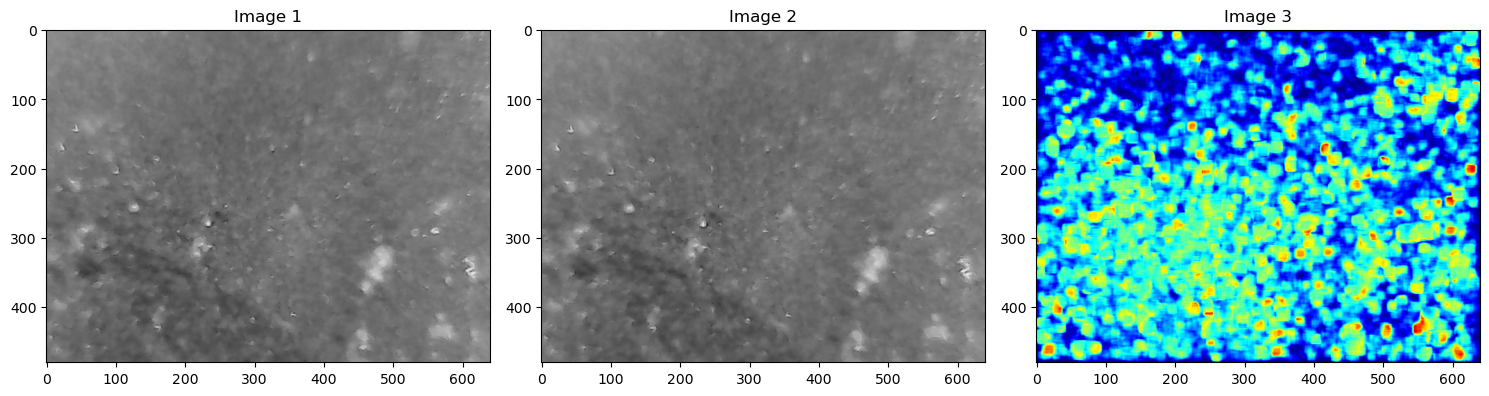

0

In [57]:
Optic_flow(0,1)

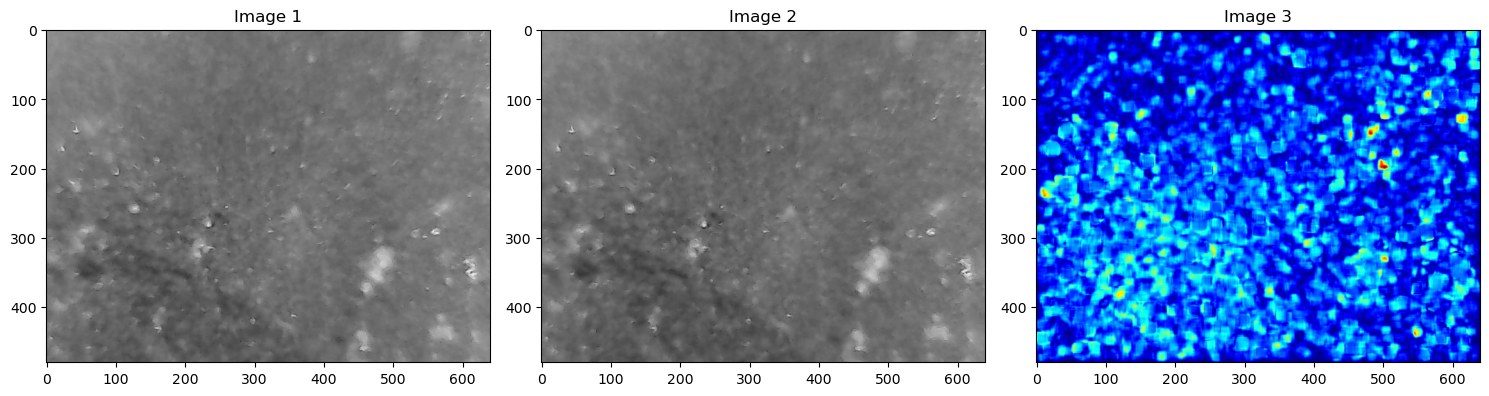

0

In [60]:
Optic_flow(2,3)

### Movement anlysis

(480, 640)


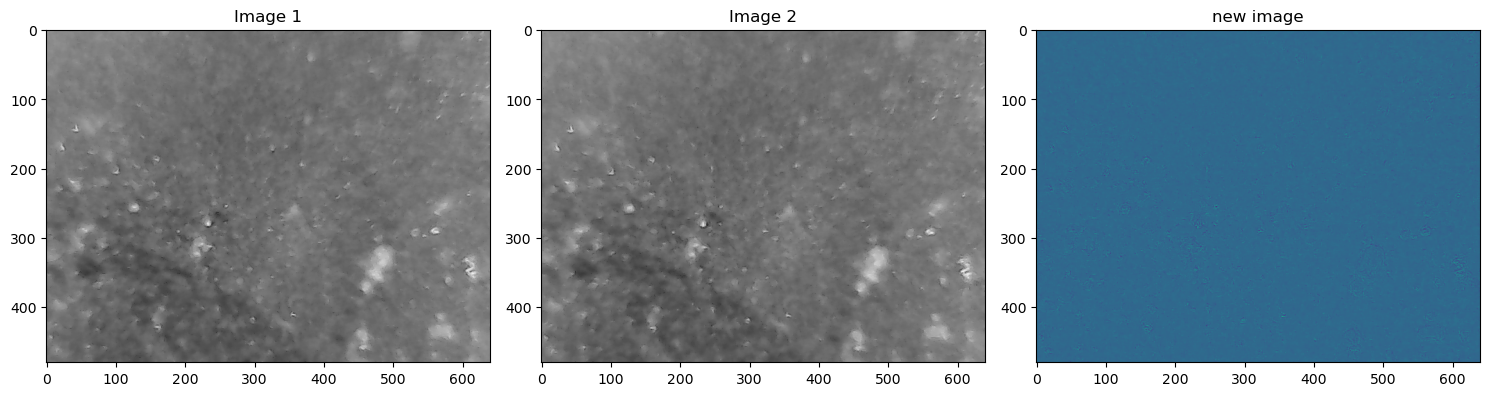

In [226]:
image1 = cv2.imread(sorted_file_path_motion[0], cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(sorted_file_path_motion[1], cv2.IMREAD_GRAYSCALE)
print(image1.shape)

new_imege = np.zeros(image1.shape)
new_imege_1 = np.zeros(image1.shape)
i=0
for i in range(0,479):
    new_imege[i+1,:] = image1[i,:]


new_imege_1 = image2 - new_imege

image1_rgb = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)



fig, axes = plt.subplots(1,3 , figsize=(15, 5))  # 1 row, 3 columns
axes[0].imshow(image1_rgb)
#axes[0].axis('off')
axes[0].set_title('Image 1')
axes[1].imshow(image2_rgb)
#axes[1].axis('off')
axes[1].set_title('Image 2')

axes[2].imshow(new_imege_1)
#axes[2].axis('off')
axes[2].set_title('new image')


# Adjust layout for better visualization
plt.tight_layout()
# Display the subplots
plt.show()


(480, 640)


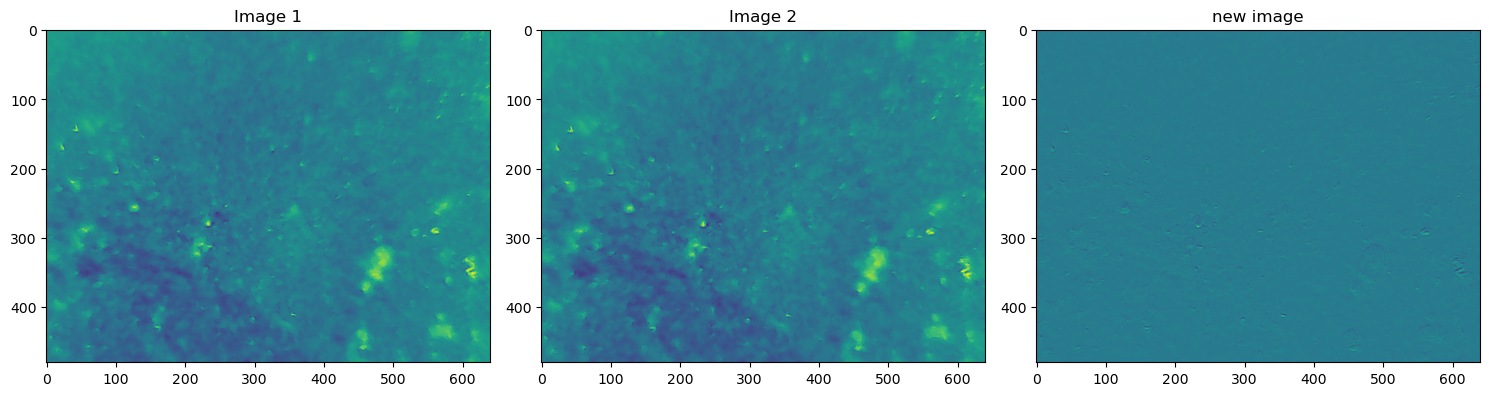

In [225]:
image1 = cv2.imread(sorted_file_path_motion[0], cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(sorted_file_path_motion[1], cv2.IMREAD_GRAYSCALE)
print(image1.shape)

new_imege = np.zeros(image1.shape)
new_imege_1 = np.zeros(image1.shape)
i=0
for i in range(0,480):
    new_imege[i,:] = image1[i,:]


new_imege_1 = image2 - new_imege

image1_rgb = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)



fig, axes = plt.subplots(1,3 , figsize=(15, 5))  # 1 row, 3 columns
axes[0].imshow(image1)
#axes[0].axis('off')
axes[0].set_title('Image 1')
axes[1].imshow(image2)
#axes[1].axis('off')
axes[1].set_title('Image 2')

axes[2].imshow(new_imege_1)
#axes[2].axis('off')
axes[2].set_title('new image')


# Adjust layout for better visualization
plt.tight_layout()
# Display the subplots
plt.show()

(480, 640)


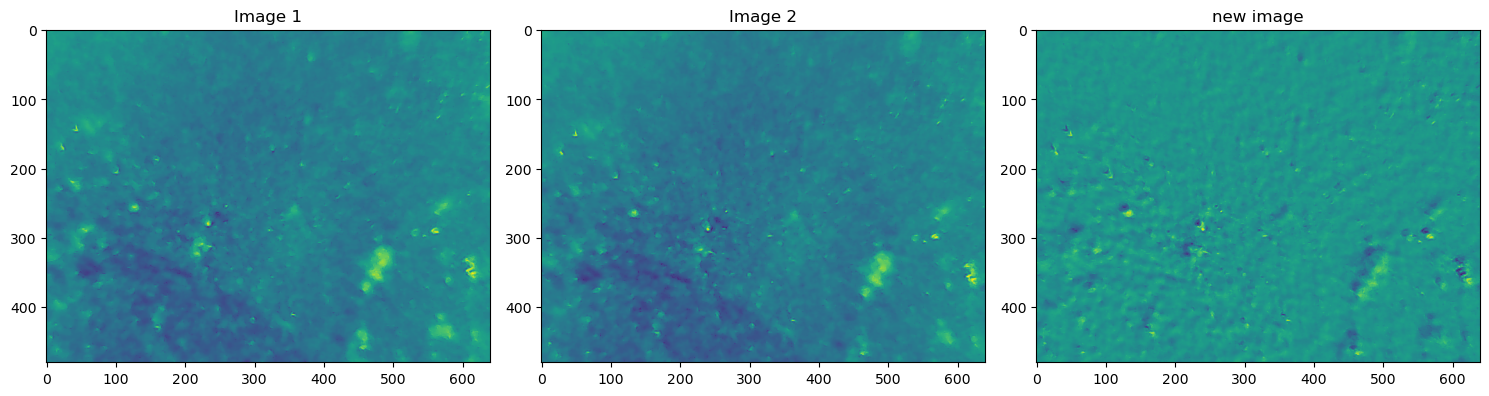

In [230]:
image1 = cv2.imread(sorted_file_path_motion[0], cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(sorted_file_path_motion[108], cv2.IMREAD_GRAYSCALE)
print(image1.shape)

new_imege = np.zeros(image1.shape)
new_imege_1 = np.zeros(image1.shape)
i=0
for i in range(0,480):
    new_imege[i,:] = image1[i,:]


new_imege_1 = image2 - new_imege

image1_rgb = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)



fig, axes = plt.subplots(1,3 , figsize=(15, 5))  # 1 row, 3 columns
axes[0].imshow(image1)
#axes[0].axis('off')
axes[0].set_title('Image 1')
axes[1].imshow(image2)
#axes[1].axis('off')
axes[1].set_title('Image 2')

axes[2].imshow(new_imege_1)
#axes[2].axis('off')
axes[2].set_title('new image')


# Adjust layout for better visualization
plt.tight_layout()
# Display the subplots
plt.show()

(480, 640)


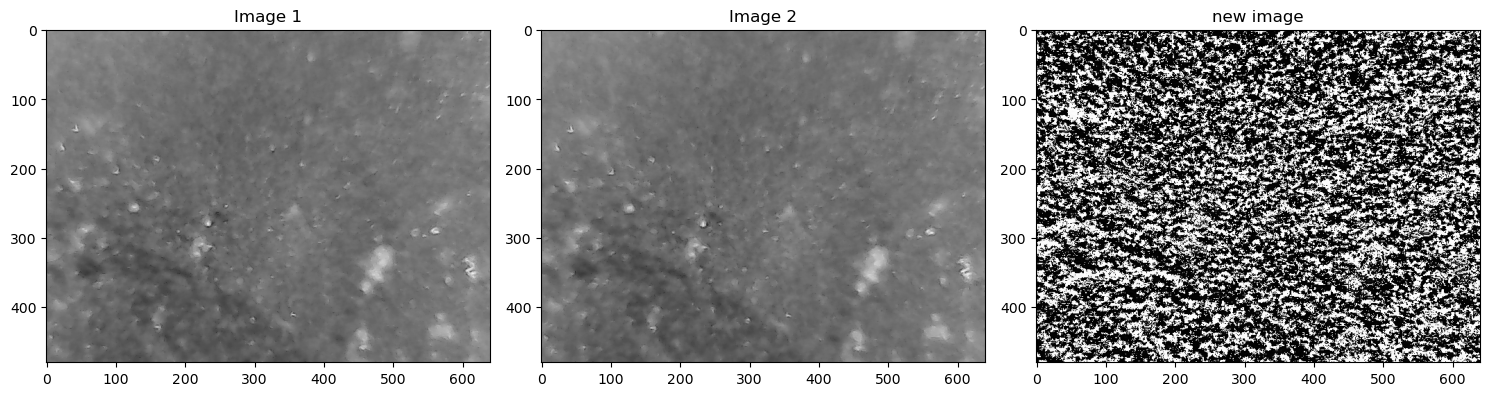

In [227]:
image1 = cv2.imread(sorted_file_path_motion[0], cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(sorted_file_path_motion[1], cv2.IMREAD_GRAYSCALE)
print(image1.shape)


new_imege_1 = image2 - image1

image1_rgb = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
new_imege_1_rgb = cv2.cvtColor(new_imege_1,cv2.COLOR_BGR2RGB)


fig, axes = plt.subplots(1,3 , figsize=(15, 5))  # 1 row, 3 columns
axes[0].imshow(image1_rgb)
#axes[0].axis('off')
axes[0].set_title('Image 1')
axes[1].imshow(image2_rgb)
#axes[1].axis('off')
axes[1].set_title('Image 2')

axes[2].imshow(new_imege_1_rgb)
#axes[2].axis('off')
axes[2].set_title('new image')


# Adjust layout for better visualization
plt.tight_layout()
# Display the subplots
plt.show()

(480, 640)


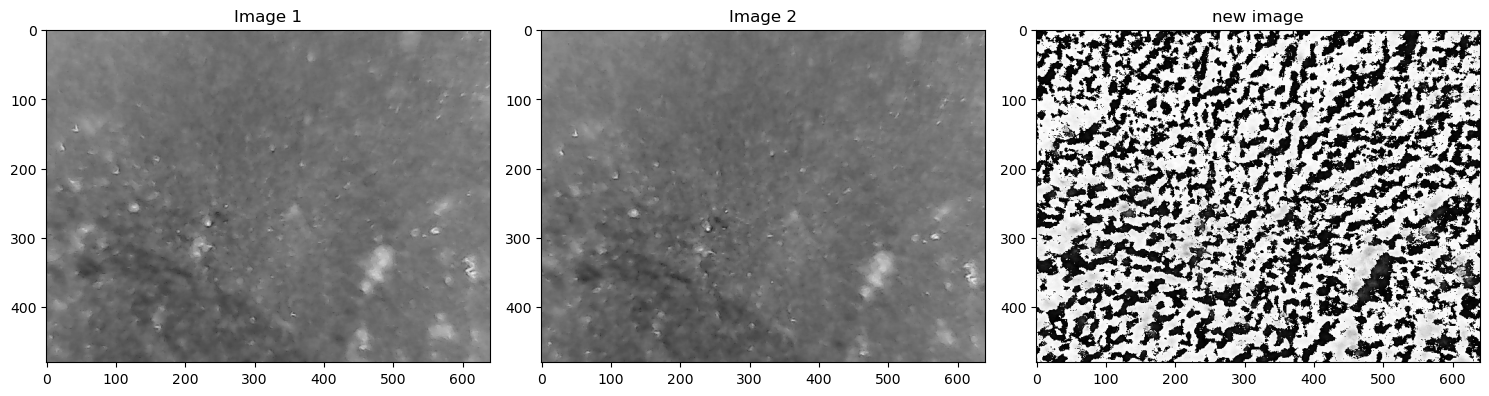

In [228]:
image1 = cv2.imread(sorted_file_path_motion[0], cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(sorted_file_path_motion[108], cv2.IMREAD_GRAYSCALE)
print(image1.shape)


new_imege_1 = image2 - image1

image1_rgb = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
new_imege_1_rgb = cv2.cvtColor(new_imege_1,cv2.COLOR_BGR2RGB)


fig, axes = plt.subplots(1,3 , figsize=(15, 5))  # 1 row, 3 columns
axes[0].imshow(image1_rgb)
#axes[0].axis('off')
axes[0].set_title('Image 1')
axes[1].imshow(image2_rgb)
#axes[1].axis('off')
axes[1].set_title('Image 2')

axes[2].imshow(new_imege_1_rgb)
#axes[2].axis('off')
axes[2].set_title('new image')


# Adjust layout for better visualization
plt.tight_layout()
# Display the subplots
plt.show()